In [1]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# 표 형태의 데이터를 다룰 수 있는 패키지인 pandas를 import하고 pd라는 별칭(alias)으로 부름
import pandas as pd

In [3]:
# pandas를 기반으로 공간 데이터를 다룰 수 있는 패키지인 geopandas를 import하고 gpd라는 별칭(alias)으로 부름
import geopandas as gpd

ModuleNotFoundError: ignored

만약, 위의 코드를 실행했을 때 에러가 발생할 경우, 에러 메시지를 잘 살펴봐 주시고, 어떻게 해야할지를 생각해 봅니다.

In [4]:
# 위의 "import geopandas as gpd"를 실행했을 때 geopandas module을 찾을 수 없다는 에러가 발생하면 아래의 코드를 실행 
!pip install geopandas folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.5 MB/s eta 0:00:00


In [5]:
# 패키지(모듈)를 설치했을 때에는 해당 패키지 import 구문을 실행해줘야 합니다.
import geopandas as gpd

In [6]:
# pandas의 read_csv 기능(함수)를 이용하여 MBRIS csv 파일을 읽어들인다
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sea/data/MBRIS.csv', index_col=None, header=0, 
                 encoding="UTF-8",   #cp949  , UTF-8
                 delimiter=',' , #항목 구분자 '\t'   |  
                 thousands = ',' ) #천단위 쉼표 제거   
df.info() #행 수 및 컬럼 정보 df.shape()을 이용해도 됨
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SPC_SCITF_NM_SHORT  499 non-null    object 
 1   COMM_KOR_NM         433 non-null    object 
 2   SPC_TXN_ID          499 non-null    int64  
 3   GENUS               499 non-null    object 
 4   GENUS_NM            453 non-null    object 
 5   FAMILY              499 non-null    object 
 6   FAMILY_NM           498 non-null    object 
 7   ORDER_              499 non-null    object 
 8   ORDER_NM            392 non-null    object 
 9   CLASS               499 non-null    object 
 10  CLASS_NM            499 non-null    object 
 11  PHYLUM              499 non-null    object 
 12  PHYLUM_NM           499 non-null    object 
 13  KINGDOM             499 non-null    object 
 14  KINGDOM_NM          499 non-null    object 
 15  LATI_DEG            499 non-null    int64  
 16  LATI_MIN

,SPC_SCITF_NM_SHORT,COMM_KOR_NM,SPC_TXN_ID,GENUS,GENUS_NM,FAMILY,FAMILY_NM,ORDER_,ORDER_NM,CLASS,...,LATI_DEG,LATI_MIN,LATI_SEC,LATI_NS_DIV_CD,LOTI_DEG,LOTI_MIN,LOTI_SEC,LOTI_EW_DIV_CD,LATI_VAL,LOTI_VAL
0,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
1,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
2,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
3,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
4,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611


In [7]:
# 좌표 항목을 가지고 지오메트리 데이터를 생성
geom = gpd.points_from_xy(df.LOTI_VAL, df.LATI_VAL)
# 만들어진 지오메트리의 첫 3개행만 조회
geom[0:3]

<GeometryArray>
[<POINT (130.409 36.034)>, <POINT (130.409 36.034)>, <POINT (130.409 36.034)>]
Length: 3, dtype: geometry

In [8]:
# df에서 가져올 항목 리스트
columns = ['SPC_SCITF_NM_SHORT', 'COMM_KOR_NM', 'SPC_TXN_ID', 'GENUS', 'GENUS_NM', 'FAMILY', 'FAMILY_NM', 'ORDER_', 'ORDER_NM', 'CLASS', 'CLASS_NM', 'PHYLUM', 'PHYLUM_NM', 'KINGDOM', 'KINGDOM_NM', 'LATI_VAL', 'LOTI_VAL']

In [9]:
# 지오메트리를 붙인 공간데이터프레임 생성 
gdf = gpd.GeoDataFrame(df[columns], geometry=geom, crs="epsg:4326")
gdf.info()
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SPC_SCITF_NM_SHORT  499 non-null    object  
 1   COMM_KOR_NM         433 non-null    object  
 2   SPC_TXN_ID          499 non-null    int64   
 3   GENUS               499 non-null    object  
 4   GENUS_NM            453 non-null    object  
 5   FAMILY              499 non-null    object  
 6   FAMILY_NM           498 non-null    object  
 7   ORDER_              499 non-null    object  
 8   ORDER_NM            392 non-null    object  
 9   CLASS               499 non-null    object  
 10  CLASS_NM            499 non-null    object  
 11  PHYLUM              499 non-null    object  
 12  PHYLUM_NM           499 non-null    object  
 13  KINGDOM             499 non-null    object  
 14  KINGDOM_NM          499 non-null    object  
 15  LATI_VAL            499 non-null

,SPC_SCITF_NM_SHORT,COMM_KOR_NM,SPC_TXN_ID,GENUS,GENUS_NM,FAMILY,FAMILY_NM,ORDER_,ORDER_NM,CLASS,CLASS_NM,PHYLUM,PHYLUM_NM,KINGDOM,KINGDOM_NM,LATI_VAL,LOTI_VAL,geometry
0,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,환대강,Annelida,환형동물문,Animalia,동물계,36.034444,130.408611,POINT (130.40861 36.03444)
1,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,환대강,Annelida,환형동물문,Animalia,동물계,36.034444,130.408611,POINT (130.40861 36.03444)
2,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,환대강,Annelida,환형동물문,Animalia,동물계,36.034444,130.408611,POINT (130.40861 36.03444)
3,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,환대강,Annelida,환형동물문,Animalia,동물계,36.034444,130.408611,POINT (130.40861 36.03444)
4,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,환대강,Annelida,환형동물문,Animalia,동물계,36.034444,130.408611,POINT (130.40861 36.03444)


In [10]:
# 공간데이터프레임을 지도로 조회 - 인터넷 연결 필요
gdf.explore()

<Axes: >

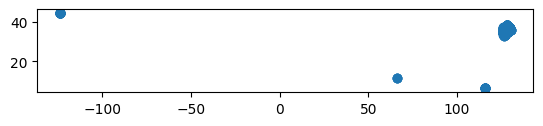

In [11]:
# 공간데이터프레임을 배경지도 없이 가장 간단하게 시각화
gdf.plot()

In [12]:
# 대한민국 해역의 MBRIS 데이터만 추출
gdf2 = gdf[ gdf.LOTI_VAL > 120 ]

In [13]:
# 이상치를 추출
gdf3 = gdf[ gdf.LOTI_VAL < 120 ]
gdf3

,SPC_SCITF_NM_SHORT,COMM_KOR_NM,SPC_TXN_ID,GENUS,GENUS_NM,FAMILY,FAMILY_NM,ORDER_,ORDER_NM,CLASS,CLASS_NM,PHYLUM,PHYLUM_NM,KINGDOM,KINGDOM_NM,LATI_VAL,LOTI_VAL,geometry
13,Archinome rosacea,NaN,270000026862,Archinome,NaN,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,11.414717,66.423747,POINT (66.42375 11.41472)
14,Archinome rosacea,NaN,270000026862,Archinome,NaN,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,11.414717,66.423747,POINT (66.42375 11.41472)
15,Eurythoe complanata,NaN,270000006526,Eurythoe,NaN,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,6.077306,116.089028,POINT (116.08903 6.07731)
16,Eurythoe complanata,NaN,270000006526,Eurythoe,NaN,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,6.077306,116.089028,POINT (116.08903 6.07731)
17,Eurythoe complanata,NaN,270000006526,Eurythoe,NaN,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,6.077306,116.089028,POINT (116.08903 6.07731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Platynereis bicanaliculata,두점참갯지렁이,270000013882,Platynereis,좁쌀이빨참갯지렁이속,Nereididae,참갯지렁이과,Phyllodocida,부채발갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,44.616200,-124.062761,POINT (-124.06276 44.61620)
418,Platynereis bicanaliculata,두점참갯지렁이,270000013882,Platynereis,좁쌀이빨참갯지렁이속,Nereididae,참갯지렁이과,Phyllodocida,부채발갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,44.616200,-124.062761,POINT (-124.06276 44.61620)
419,Platynereis bicanaliculata,두점참갯지렁이,270000013882,Platynereis,좁쌀이빨참갯지렁이속,Nereididae,참갯지렁이과,Phyllodocida,부채발갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,44.616200,-124.062761,POINT (-124.06276 44.61620)
494,Branchipolynoe seepensis,NaN,270000026863,Branchipolynoe,NaN,Polynoidae,비늘갯지렁이과,Phyllodocida,부채발갯지렁이목,Polychaeta,다모강,Annelida,환형동물문,Animalia,동물계,11.414717,66.423747,POINT (66.42375 11.41472)


<Axes: >

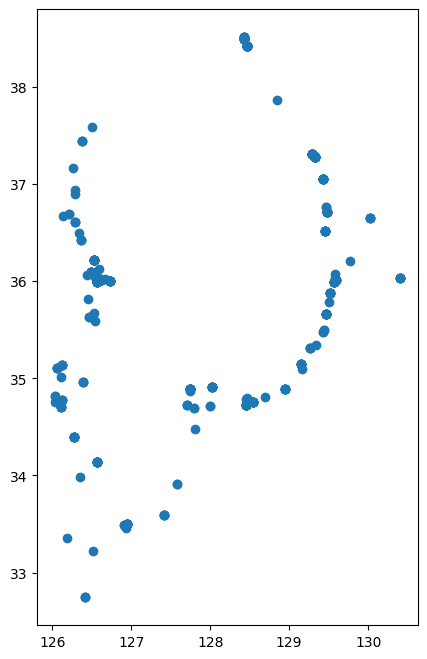

In [14]:
gdf2.plot(figsize=(8, 8))

In [15]:
#생성된 포인트 공간데이터를 shp으로 저장 
gdf2.to_file('/content/gdrive/My Drive/Colab Notebooks/sea/result/mbris.shp', encoding='UTF-8')

<ipython-input-15-27070c17ee7a>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf2.to_file('/content/gdrive/My Drive/Colab Notebooks/sea/result/mbris.shp', encoding='UTF-8')
